# Vehicle Price Prediction
* Link dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv
* This dataset contains information about used cars: detailed specs and prices
* This dataset helps users buying cars build a price prediction model
  * Get a good deal on a new car
  * Figure out exactly how much one should pay for a specific type of car

### 🙈 Suppress warnings

In [8]:
import warnings

warnings.simplefilter(action='ignore')

### 👀 Load dataset

In [9]:
import pandas as pd

data = pd.read_csv('vehicle-dataset.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 🪄 Create a new column **age**

In [10]:
data['age'] = 2022 - data['year']
data.drop('year', axis=1, inplace = True)

data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15


## Exploratory Data Analysis (EDA)

### 📊 Visualize relations between the categorical features and the target column (selling_price)

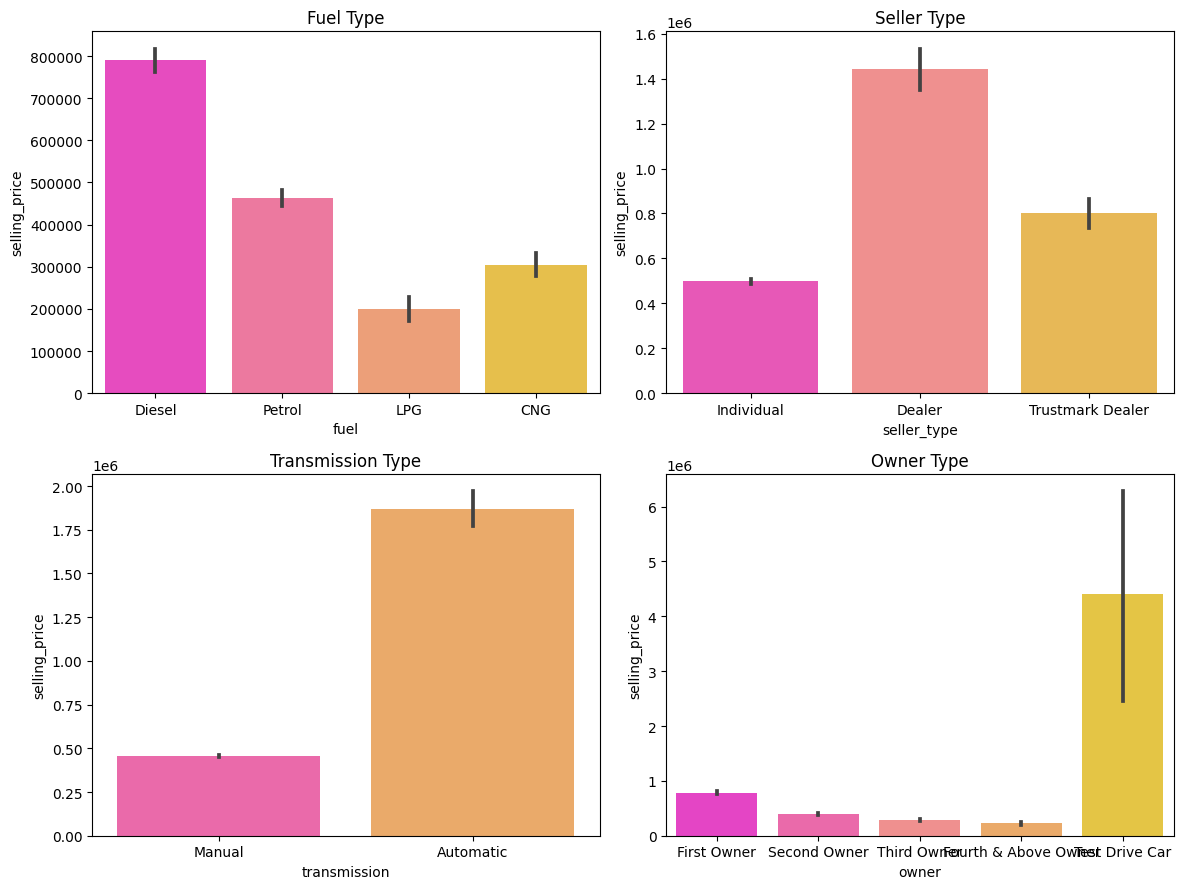

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12,9))

ax1 = plt.subplot(221)
ax1 = sns.barplot(x='fuel', y='selling_price', data=data, palette='spring')
ax1.set_title("Fuel Type")

ax2 = plt.subplot(222)
ax2 = sns.barplot(x='seller_type', y='selling_price', data=data, palette='spring')
ax2.set_title("Seller Type")

ax3 = plt.subplot(223)
ax3 = sns.barplot(x='transmission', y='selling_price', data=data, palette='spring')
ax3.set_title("Transmission Type")

ax4 = plt.subplot(224)
ax4 = sns.barplot(x='owner', y='selling_price', data=data, palette='spring')
ax4.set_title("Owner Type")

plt.tight_layout()

* 🔖 **Fuel**: Diesel Engine Vehicles have the highest selling price
* 🔖 **Seller Type**: Dealers can sell vehicles at a higher selling price than a general individual
* 🔖 **Transmission**: Cars with automatic transmission tend to be more expensive
* 🔖 **Owner**: The price of a car tends to decrease with each owner

### 📊 Visualize the relationship between **selling_price** against **km_driven** and **age**

🔖 **Km driven**: Lesser the km driven higher the selling price

<AxesSubplot: xlabel='km_driven', ylabel='selling_price'>

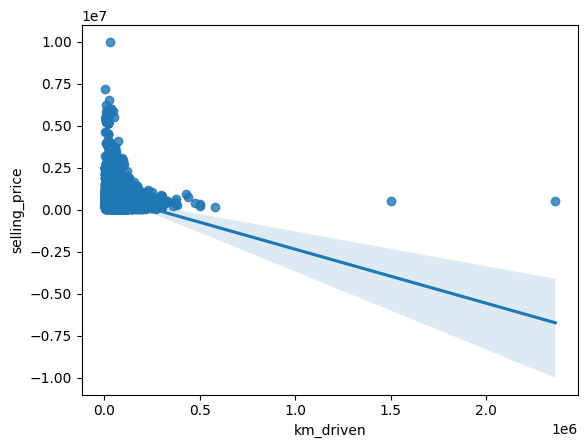

In [12]:
sns.regplot(x='km_driven', y='selling_price', data=data)

🔖 Age: The selling price decreases overall for older vehicles!

<AxesSubplot: xlabel='age', ylabel='selling_price'>

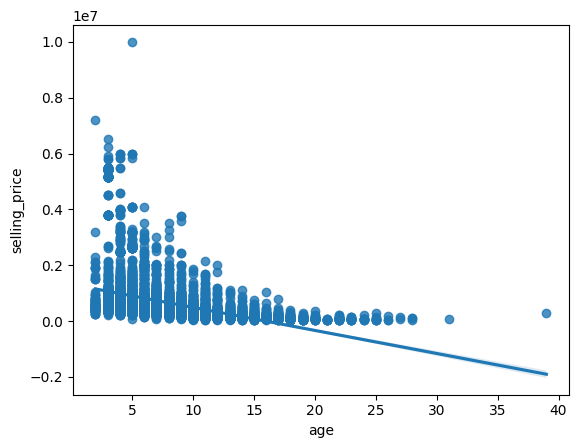

In [13]:
sns.regplot(x='age', y='selling_price', data=data)

## Feature Engineering

In [14]:
data_predict = data

### 🔨 Data Preprocessing

In [15]:
data_predict.drop('name', axis=1, inplace=True)
data_predict.drop('torque', axis=1, inplace=True)

In [16]:
def remove_unit(column):
  return column.apply(lambda x: float(x.split(' ')[0]) if type(x) != float else x)
  
data_predict['mileage'] = remove_unit(data_predict['mileage'])
data_predict['engine'] = remove_unit(data_predict['engine'])
data_predict['max_power'] = remove_unit(data_predict['max_power'])

data_predict.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15


### 🚫 Check out missing data

<AxesSubplot: >

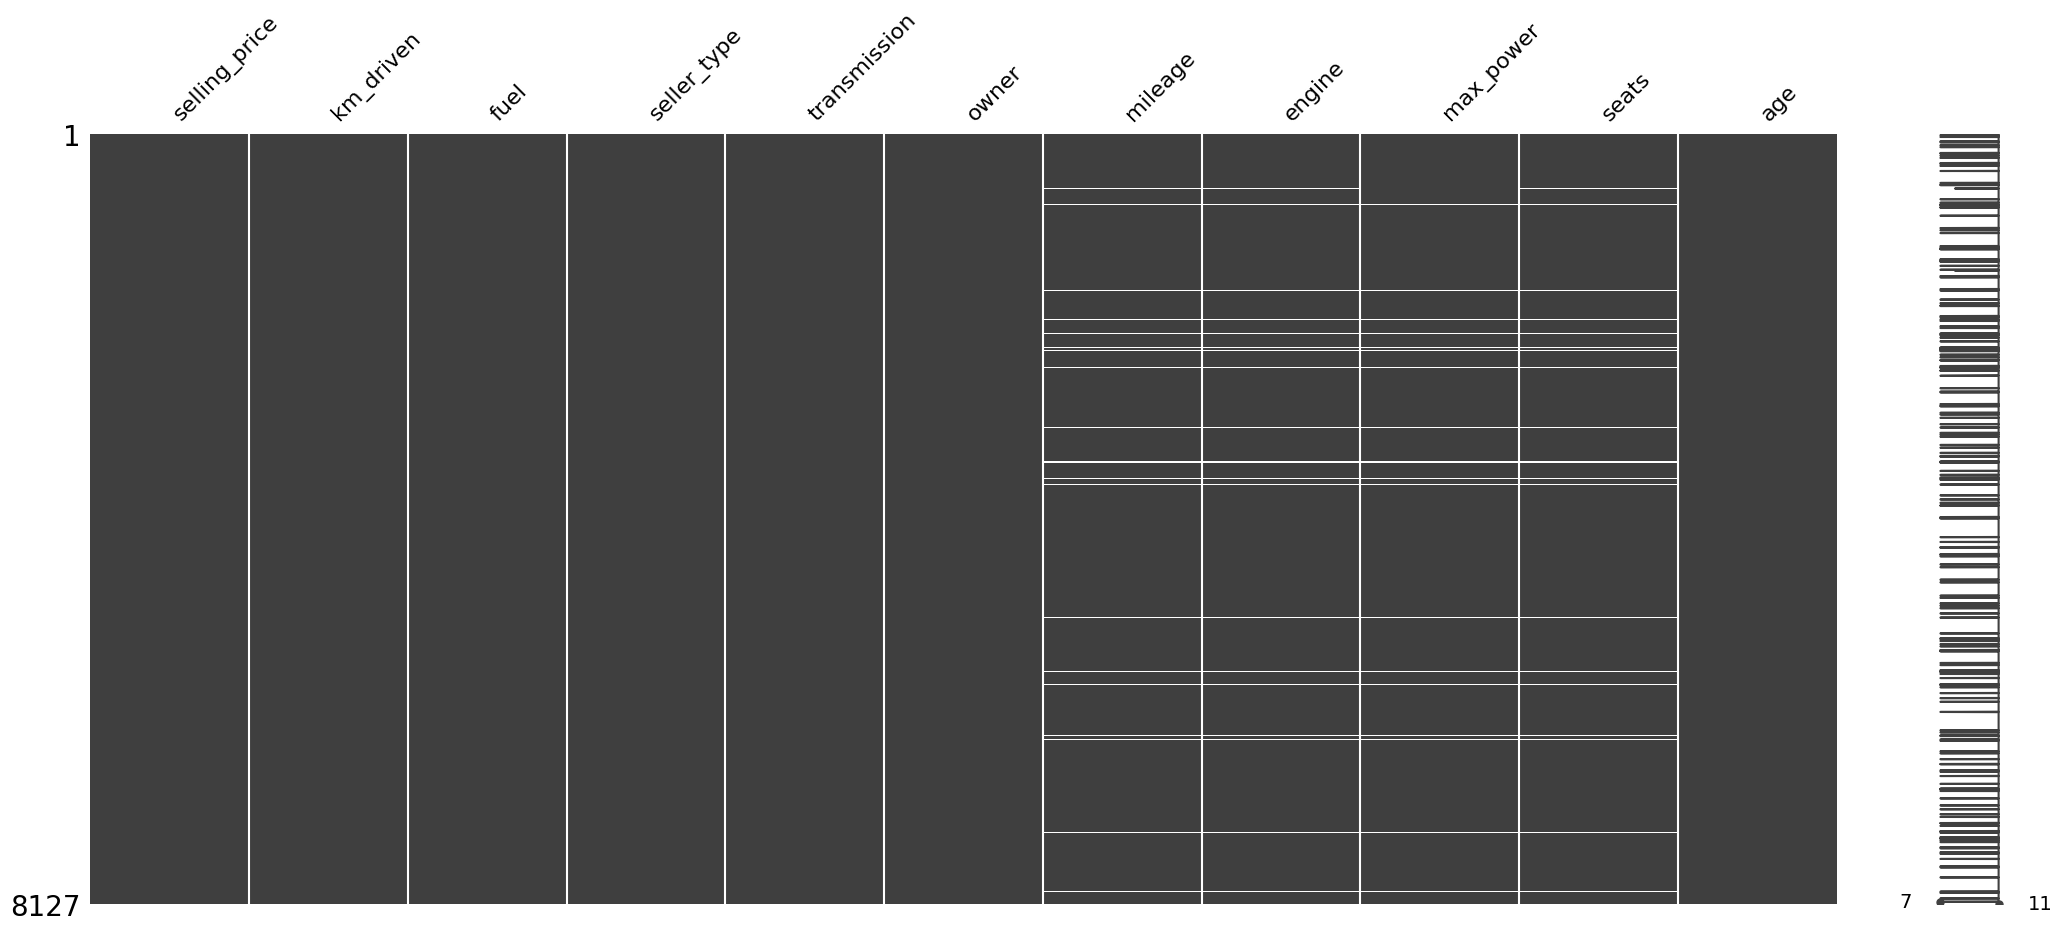

In [17]:
import missingno as msno

msno.matrix(data_predict)

In [18]:
data_predict.isnull().any()

selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
seats             True
age              False
dtype: bool

### 🧹 Missing data processing

In [19]:
def mean_imputation(data, column):
  value_mean = data[column].dropna().mean()
  data[column] = data[column].fillna(value_mean)
  return data
  
mean_imputation(data_predict, 'mileage')
mean_imputation(data_predict, 'engine')
mean_imputation(data_predict, 'max_power')

data_predict.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15


In [13]:
print(data_predict.seats.unique())

[ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


In [20]:
import numpy as np

def arbitrary_imputation(data, column):
  seats = [2, 4, 5, 6, 7, 8, 9, 10, 14]
  data[column] = data[column].fillna(seats[np.random.randint(0, len(seats))])
  return data

arbitrary_imputation(data_predict, 'seats')

data_predict.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15


### 🎨 Convert categorical features to numeric type

In [21]:
print(data_predict.fuel.unique(), '\n')
print(data_predict.seller_type.unique(), '\n')
print(data_predict.transmission.unique(), '\n')
print(data_predict.owner.unique())

['Diesel' 'Petrol' 'LPG' 'CNG'] 

['Individual' 'Dealer' 'Trustmark Dealer'] 

['Manual' 'Automatic'] 

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [22]:
from sklearn.preprocessing import LabelEncoder

le_fuel = LabelEncoder()
le_fuel.fit(['Diesel', 'Petrol', 'LPG', 'CNG'])
data_predict['fuel'] = le_fuel.transform(data_predict['fuel'])

le_seller_type = LabelEncoder()
le_seller_type.fit(['Individual', 'Dealer', 'Trustmark Dealer'])
data_predict['seller_type'] = le_seller_type.transform(data_predict['seller_type'])

le_transmission = LabelEncoder()
le_transmission.fit(['Manual', 'Automatic'])
data_predict['transmission'] = le_transmission.transform(data_predict['transmission'])

le_owner = LabelEncoder()
le_owner.fit(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'])
data_predict['owner'] = le_owner.transform(data_predict['owner'])

data_predict[2465:2470]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
2465,114999,58632,3,0,1,2,14.000000,796.000000,35.000000,5.0,14
2466,110000,58632,2,0,1,2,19.419861,1458.708829,91.517919,9.0,14
2467,850000,80000,1,1,0,2,16.000000,2179.000000,140.000000,7.0,6
2468,750000,70000,1,1,1,0,24.520000,1248.000000,88.500000,7.0,6
2469,265000,90000,3,1,1,0,23.010000,999.000000,67.000000,5.0,5


### ✂️ Split Train-Test dataset

In [23]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_predict, test_size=0.2, random_state=1)

### 🔍 Check out data distribution of data_train

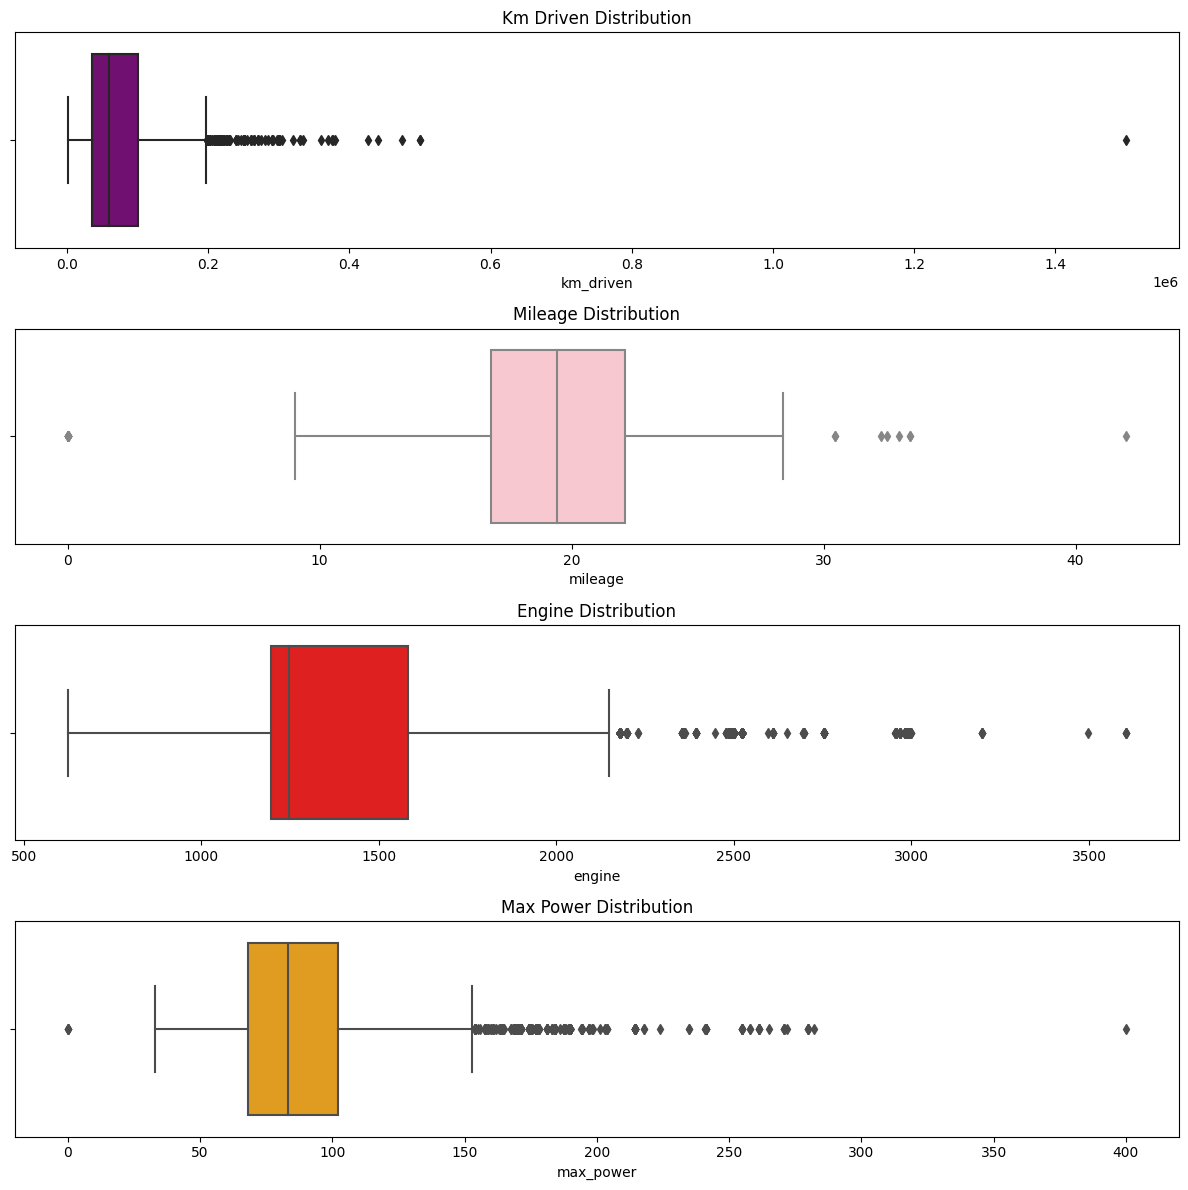

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(12,12))

ax1 = plt.subplot(411)
ax1 = sns.boxplot(data=data_train, x='km_driven', color='purple')
ax1.set_title("Km Driven Distribution")

ax2 = plt.subplot(412)
ax2 = sns.boxplot(data=data_train, x='mileage', color='pink')
ax2.set_title("Mileage Distribution")

ax3 = plt.subplot(413)
ax3 = sns.boxplot(data=data_train, x='engine', color='red')
ax3.set_title("Engine Distribution")

ax4 = plt.subplot(414)
ax4 = sns.boxplot(data=data_train, x='max_power', color='orange')
ax4.set_title("Max Power Distribution")

plt.tight_layout()

Text(0.5, 1.0, 'Max Power Distribution')

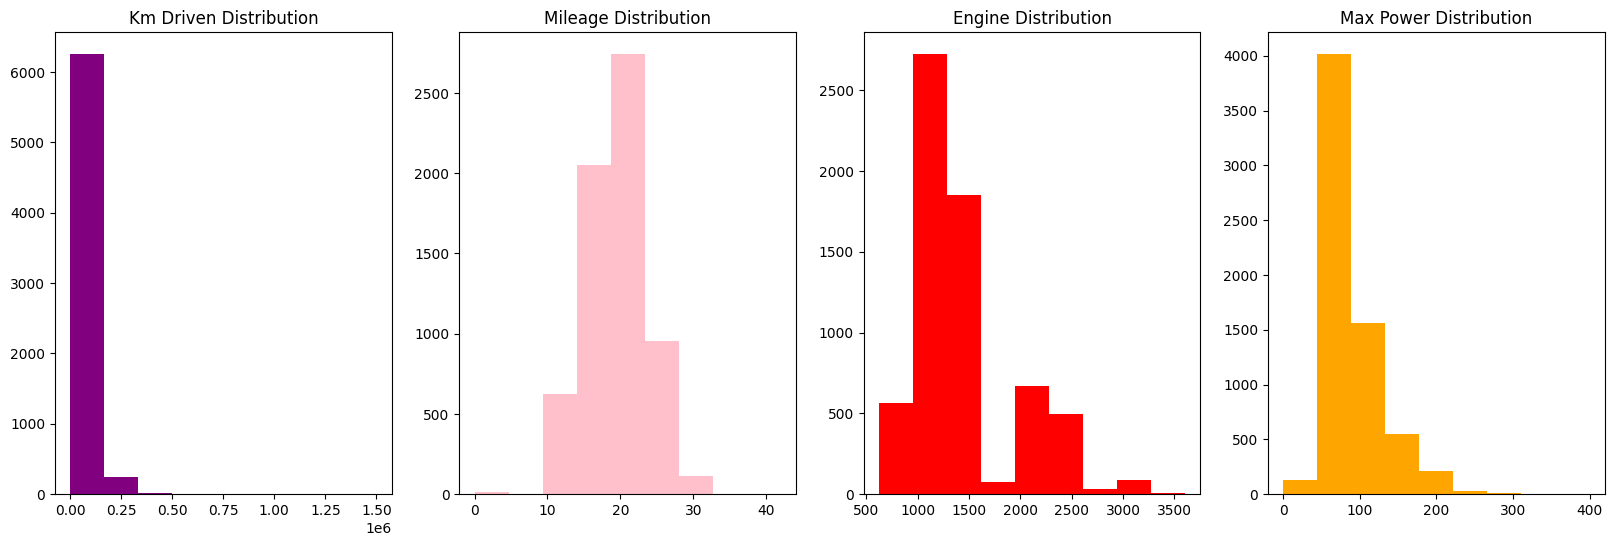

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))
(ax1, ax2, ax3, ax4) = ax

ax1.hist(data_train.km_driven, bins=9, color='purple')
ax1.set_title("Km Driven Distribution")

ax2.hist(data_train.mileage, bins=9, color='pink')
ax2.set_title("Mileage Distribution")

ax3.hist(data_train.engine, bins=9, color='red')
ax3.set_title("Engine Distribution")

ax4.hist(data_train.max_power, bins=9, color='orange')
ax4.set_title("Max Power Distribution")

🔖 **km_driven**, **engine**, **max_power** have **skewed** distribution, use **IQR** to find the upper and lower bounds

🔖 **mileage** has standard distribution, use **mean** to find the upper and lower bounds

### 🧹 Outlier processing using IQR

In [26]:
def outliers_iqr(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  data_train[column] = data_train[column].clip(lower_bound, upper_bound)

  return data_train[column]

data_train['km_driven'] = outliers_iqr('km_driven')
data_train['engine'] = outliers_iqr('engine')
data_train['max_power'] = outliers_iqr('max_power')

### 🧹 Outlier processing using mean

In [27]:
def outliers_mean(column):
  lower_bound = data_train[column].mean() - (data_train[column].std() * 3)
  upper_bound = data_train[column].mean() + (data_train[column].std() * 3)

  data_train[column] = data_train[column].clip(lower_bound, upper_bound)

  return data_train[column]

data_train['mileage'] = outliers_mean('mileage')

### 📊 Data distribution with outlier processing

Text(0.5, 1.0, 'Max Power Distribution')

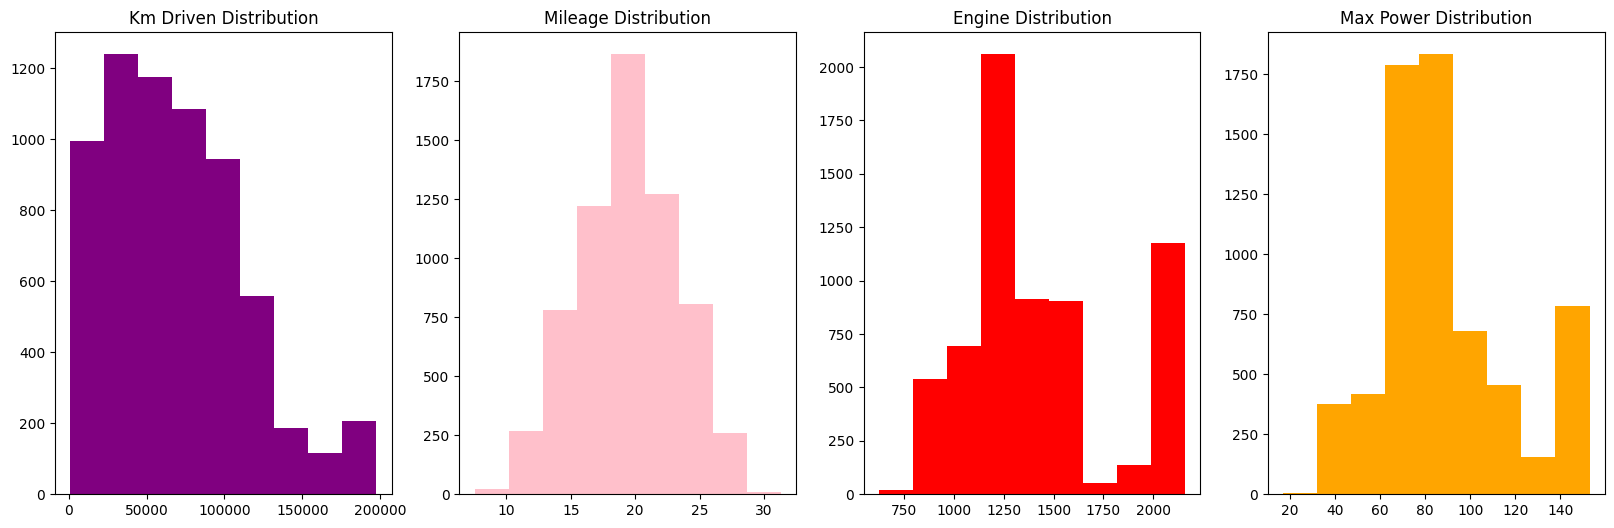

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))
(ax1, ax2, ax3, ax4) = ax

ax1.hist(data_train.km_driven, bins=9, color='purple')
ax1.set_title("Km Driven Distribution")

ax2.hist(data_train.mileage, bins=9, color='pink')
ax2.set_title("Mileage Distribution")

ax3.hist(data_train.engine, bins=9, color='red')
ax3.set_title("Engine Distribution")

ax4.hist(data_train.max_power, bins=9, color='orange')
ax4.set_title("Max Power Distribution")

### 🔨 Normalize the data with z-score

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

data_train[vars_normalizing] = scaler.fit_transform(data_train[vars_normalizing])
data_test[vars_normalizing] = scaler.transform(data_test[vars_normalizing])

### ✂️ Separate dataset into features and target

In [30]:
X_train = data_train.drop('selling_price', axis=1)
y_train = data_train['selling_price']

X_test = data_test.drop('selling_price', axis=1)
y_test = data_test['selling_price']

## Linear Regression

### 💡 Create Model

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 📝 Fetch the predictions on our test data

In [32]:
y_pred = lr.predict(X_test)

### 📈 Visualize test vs pred data

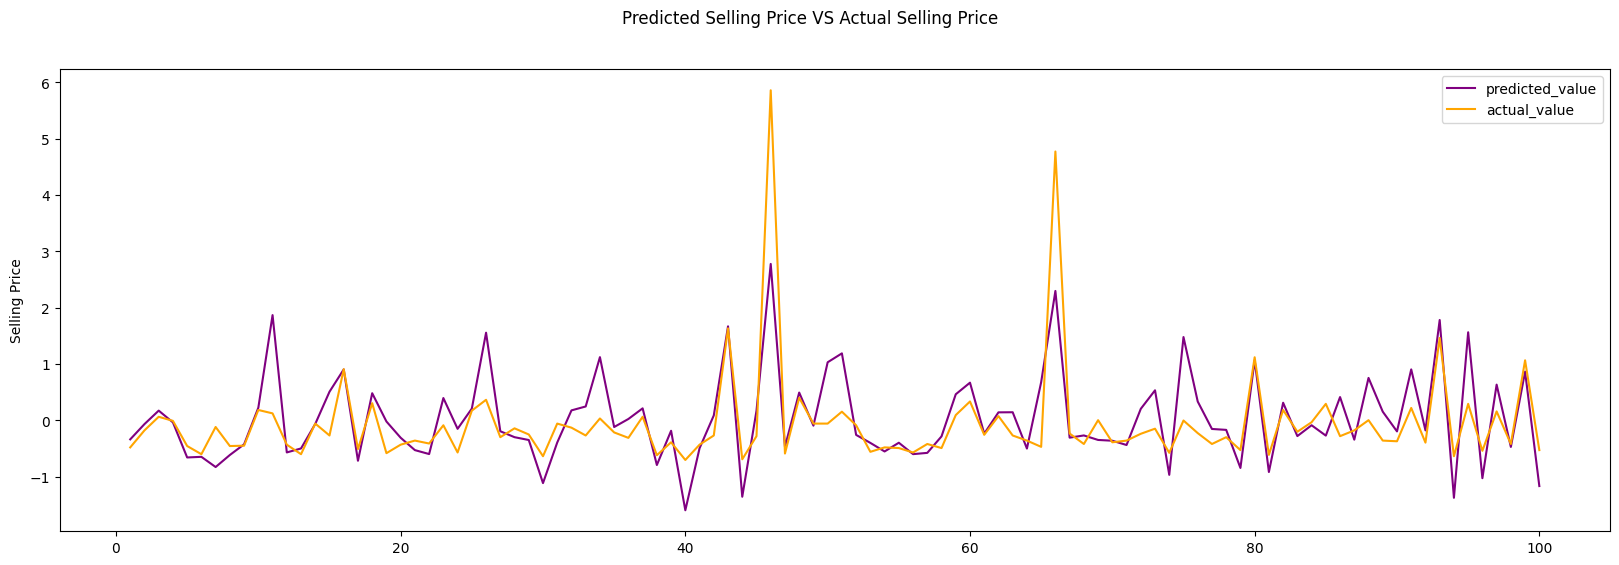

In [33]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:100], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:100], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Selling Price')
  fig.suptitle('Predicted Selling Price VS Actual Selling Price')
  plt.show()

plot_residuals(y_test, y_pred)

### 🧮 Score
#R2 score: Giá trị hệ số xác định R2 cho mô hình được dự đoán trên tập test set.

#CV scores: Kết quả đánh giá mô hình thông qua phương pháp cross-validation trên tập train set.

#CV scores mean: Giá trị trung bình của kết quả cross-validation.

In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def accuracy_score(y_test, y_pred, algorithm):
  R2 = r2_score(y_test, y_pred)
  cross_val = cross_val_score(algorithm, X_train, y_train, cv=5)

  r2 = []
  r2.append(R2)

  CV = []
  CV.append(cross_val.mean())

  print("r_2 score:", R2, "\n")
  print("CV scores:", cross_val, "\n")
  print("CV scores mean:", cross_val.mean())

accuracy_score(y_test, y_pred, lr)

r_2 score: 0.5713595645809143 

CV scores: [0.62750316 0.58179527 0.58720989 0.60011446 0.60837735] 

CV scores mean: 0.6010000269658892


## Advanced Regression (XGBoost Regression)

### ✍🏼 Hyperparamter Tuning

In [35]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

* **n_estimators**: number of trees you want to build
* **max_depth**: maximum depth of a tree
* **booster**: Loại hàm tối ưu sử dụng trong mô hình:

    gbtree: loại mô hình dựa trên cây quyết định. Các thuộc tính quan trọng được lựa chọn bằng cách đếm số lần xuất hiện trong các nốt cây quyết định khác nhau.

    gblinear: loại mô hình dựa trên hồi quy tuyến tính. Nó là một phương pháp giảm kích thước thông tin để giảm quá trình tính toán trong bài toán tối ưu hóa.
* **learning_rate**: tốc độ học của mô hình, [0,1]
* **min_child_weight**: Độ lớn tối thiểu của một child note
* **base_score**: default = 0.5, the initial prediction score of all instances, global bias

### ✍🏼 Define the grid of hyperparameters to search

In [5]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

### ⚙️ Set up the random search with 5-fold cross validation

Sử dụng RandomizedSearchCV từ thư viện sklearn.model_selection để tìm kiếm siêu tham số tốt nhất cho mô hình XGBRegressor từ thư viện xgboost.

In [36]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

### 📝 Train on the RandomSearchCV object to get best estimators

In [37]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=3,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

### 📌 Get the best estimators

Các siêu tham số tốt nhất được tìm thấy trong quá trình tinh chỉnh siêu tham số (hyperparameter tuning).

In [33]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

### 📌 Get the best params

Giá trị tối ưu cho các tham số trong mô hình XGBoost Regression.

In [34]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.75}

### 💊 Reinitialize the regressor object with the best probable estimators

In [35]:
regressor = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
            colsample_bynode=1, colsample_bytree=1, gamma=0,
            importance_type='gain', interaction_constraints='',
            learning_rate=0.1, max_delta_step=0, max_depth=5,
            min_child_weight=2, missing=np.nan,
            n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
            tree_method='exact', validate_parameters=1)

### 💊 Fit the xgbRegressor on our training data

In [36]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

### 📝 Fetch the predictions on our test data

In [37]:
y_pred_advanced = regressor.predict(X_test)

### 📈 Visualize test vs pred data

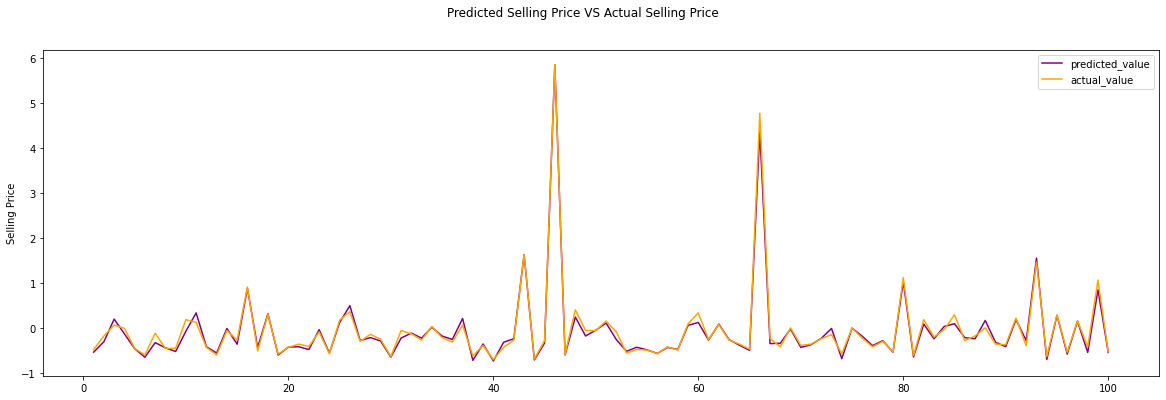

In [38]:
plot_residuals(y_test, y_pred_advanced)

### 🧮 Score

In [39]:
accuracy_score(y_test, y_pred_advanced, regressor)

r_2 score: 0.9609809062537007 

CV scores: [0.9621999  0.95230508 0.94754192 0.94743269 0.9609045 ] 

CV scores mean: 0.9540768191599058


### 🚀 Conclusions
* Car age is effecting negatively as the Selling Price decreases for an older car.
* Selling Price of cars with Fuel type Diesel is higher.
* Car of Manual type is of less priced whereas of Automatic type is high.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.
* XGBRegressor performs considerably better than Linear Regression with a R2 score of 0.95 compared to 0.60